- DM project- Group 82
- Student: Diogo Pimenta nº 20230498 
- Student: Cláudia Beiral nº 20230387 
- Student: João Maia nº 20230746


***Data preprocessing and rfm analysis***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from pandas_profiling import ProfileReport

C:\Users\diogo\AppData\Local\Temp\ipykernel_2172\2232968875.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('XYZ_sports_dataset.csv', sep=';')

In [3]:
#show all columns in the df
pd.set_option('display.max_columns', None)

In [4]:
#set id as index
df.set_index('ID', inplace=True)

_Data inconsistencies_

In [5]:
#check if there are people who are less than 18 that make money
df[(df['Age'] < 16) & (df['Income'] > 0)]


Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
11722   13  Female  1260.0      2015-09-16       2017-08-29      2017-01-01   
12271   15  Female  1290.0      2016-01-13       2016-07-31      2016-01-01   
13013   11    Male  1120.0      2017-01-10       2019-07-09      2019-01-01   
13196   15  Female  1240.0      2018-09-21       2019-07-09      2019-01-01   
13889    5  Female  3400.0      2019-04-04       2019-04-04      2019-07-01   
14071   15    Male  1870.0      2019-03-08       2019-05-20      2019-01-01   
14128   14  Female  2640.0      2015-02-03       2018-07-31      2018-01-01   
15279    9    Male  3490.0      2014-08-01       2018-01-07      2017-07-01   
15302   15    Male  1660.0      2015-09-25       2019-04-11      2019-01-01   
16510   15  Female  1200.0      2015-05-11       2015-09-16      2015-01-01   
16655   15  Female  1200.0      2018-10-18       2018-12-11      2018-07-01   
17542   13  Female  3870.0      2018-10-02       2018-10-02      2019-07-01   
18805    5  Female  3380.0      2019-05-20       2019-05-20      2019-07-01   
19346   14    Male  1390.0      2017-09-12       2018-05-08      2018-01-01   
19982   15  Female  1270.0      2019-09-03       2019-10-13      2019-07-01   
21012    2  Female  2260.0      2018-06-08       2018-06-08      2018-01-01   
23055   15    Male  1210.0      2016-09-07       2019-07-09      2019-01-01   
23255   15    Male  1310.0      2018-09-12       2018-09-12      2019-07-01   
24359    4  Female  3430.0      2019-07-19       2019-07-19      2019-07-01   
24830    2    Male  2750.0      2018-07-26       2018-07-26      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
11722       2017-12-31    2017-05-29                    92         745.10   
12271       2016-12-31    2016-07-30                     1         305.35   
13013       2019-12-31    2019-06-17                    22         854.91   
13196       2019-12-31    2019-06-04                    35         256.80   
13889       2019-12-31    2019-09-18                    43         180.20   
14071       2019-06-30    2019-04-16                    34          91.50   
14128       2018-12-31    2017-05-17                   440        1289.15   
15279       2018-06-30    2017-11-24                    44        1054.75   
15302       2019-06-30    2019-03-12                    30         577.60   
16510       2015-12-31    2015-07-29                    49          93.60   
16655       2018-12-31    2018-11-23                    18          60.40   
17542       2019-12-31    2019-10-11                    20         400.60   
18805       2019-12-31    2019-09-21                    40         255.20   
19346       2018-06-30    2018-03-27                    42         302.40   
19982       2019-12-31    2019-09-13                    30          65.20   
21012       2018-12-31    2019-10-26                     5         566.92   
23055       2019-12-31    2018-03-03                   493         728.10   
23255       2019-12-31    2019-10-30                     1         457.00   
24359       2019-12-31    2019-10-25                     6          90.20   
24830       2019-12-31    2019-10-19                    12         773.32   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
11722          0                  0.0              0.0                0.0   
12271          1                  0.0              1.0                0.0   
13013          0                  0.0              1.0                0.0   
13196          0                  0.0              0.0                0.0   
13889          0                  0.0              1.0                0.0   
14071          0                  

In [6]:
#for people who are under 16, set their income to 0
df.loc[df['Age'] < 16, 'Income'] = 0

In [7]:
#show rows where lifetimevalue is 0
df[df['LifetimeValue'] == 0]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
15746   42    Male  4520.0      2017-11-29       2018-07-31      2018-01-01   
19016   28  Female  2450.0      2015-05-11       2015-09-16      2015-01-01   
19639    6    Male     0.0      2014-09-24       2015-09-16      2014-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
15746       2018-12-31    2018-04-18                   104            0.0   
19016       2015-06-30    2015-05-13                   126            0.0   
19639       2014-12-31    2014-10-09                   342            0.0   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
15746          0                  0.0              0.0                1.0   
19016          0                  0.0              0.0                0.0   
19639          0                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
15746              0.0             0.0               0.0               0.0   
19016              0.0             0.0               1.0               0.0   
19639              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
15746               0.0                0.0              0.0   
19016               0.0                0.0              0.0   
19639               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
15746                 30.0                0                       7.0   
19016                  1.0                1                       2.0   
19639                  1.0                0                       2.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
15746                       60.97                   0                 0   
19016                        6.28                   1                 1   
19639                       17.42                   1                 1   

       HasReferences  NumberOfReferences  Dropout  
ID                                                 
15746            1.0                   1        1  
19016            0.0                   0        1  
19639            0.0                   0        1

In [8]:
#drop rows where lifetimevalue is 0
df = df[df['LifetimeValue'] != 0]

In [9]:
#Check for cases in which the number of references is 0 but the person has references
df[(df['NumberOfReferences'] == 0) & (df['HasReferences'] == 1)]


Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
11259   43  Female  4270.0      2017-08-24       2018-04-07      2018-01-01   
11626   22    Male  1620.0      2014-10-24       2016-07-31      2016-01-01   
12548   14    Male     0.0      2016-02-22       2016-07-31      2016-01-01   
12943   27    Male  1760.0      2014-06-18       2015-09-16      2015-01-01   
14136   22  Female  2030.0      2015-03-03       2016-01-04      2015-07-01   
14607   19  Female  1230.0      2015-01-26       2015-09-16      2015-01-01   
16792    9    Male     0.0      2017-09-01       2017-09-01      2019-07-01   
17159   21    Male  1280.0      2016-04-11       2016-10-22      2016-07-01   
17283   23  Female  2720.0      2016-04-01       2017-03-09      2017-01-01   
17501   26  Female  2950.0      2015-06-04       2018-07-08      2018-01-01   
19225   27  Female  2730.0      2014-09-30       2018-07-08      2018-01-01   
21604   21  Female  1310.0      2018-09-28       2019-07-09      2019-01-01   
23542   22    Male  2220.0      2015-09-23       2015-12-31      2015-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
11259       2018-06-30    2017-11-02                   156          154.6   
11626       2016-12-31    2016-06-29                    32          113.6   
12548       2016-12-31    2016-07-18                    13          258.6   
12943       2016-06-30    2015-05-12                   127          160.6   
14136       2016-06-30    2015-11-30                    35          153.2   
14607       2015-06-30    2015-03-31                   169           71.6   
16792       2019-12-31    2019-10-31                     0         1027.7   
17159       2016-12-31    2016-10-20                     2          106.6   
17283       2017-06-30    2017-03-07                     2          181.2   
17501       2018-12-31    2018-03-23                   107          358.6   
19225       2018-12-31    2018-05-10                    59          226.8   
21604       2019-12-31    2019-06-25                    14          243.4   
23542       2015-12-31    2015-12-18                    13          108.6   

       UseByTime  AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                                          
11259          0                  0.0              0.0                1.0   
11626          0                  0.0              0.0                1.0   
12548          0                  0.0              0.0                0.0   
12943          0                  0.0              1.0                0.0   
14136          0                  0.0              0.0                1.0   
14607          0                  0.0              0.0                1.0   
16792          0                  0.0              1.0                0.0   
17159          0                  0.0              0.0                1.0   
17283          0                  0.0              0.0                1.0   
17501          0                  0.0              1.0                1.0   
19225          0                  0.0              0.0                1.0   
21604          0                  0.0              1.0                0.0   
23542          0                  0.0              0.0                1.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
11259              0.0             0.0               0.0               0.0   
11626              0.0             0.0               0.0               0.0   
12548              0.0             0.0               1.0               0.0   
12943              0.0             0.0               0.0               0.0   
14136              0.0             0.0   

In [10]:
#Alter these cases so that the person has no references
df.loc[(df['NumberOfReferences'] == 0) & (df['HasReferences'] == 1), 'HasReferences'] = 0

In [11]:
#Check cases of the opposite
df[(df['NumberOfReferences'] != 0) & (df['HasReferences'] == 0)]


Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

_Feature engineering_


In [12]:
#change male to 1 and female to 0 in gender
from sklearn.preprocessing import LabelEncoder

# Fill NaN values with a default category ('Unknown' for instance)
df['Gender'].fillna('Unknown', inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [13]:
#for the rows where the enrollment start and finish are the same, set enrollment finish to 2019-11-01 as they are our current clients
df.loc[df['EnrollmentStart'] == df["EnrollmentFinish"], 'EnrollmentFinish'] = '2019-10-31'

In [14]:
#add column enrollment duration which is the difference in days between enrollment start and finish
df['EnrollmentDuration_days'] = (pd.to_datetime(df['EnrollmentFinish']) - pd.to_datetime(df['EnrollmentStart'])).dt.days

In [15]:
#add enrollment duration in months
df["EnrollmentDuration_months"] = df["EnrollmentDuration_days"] / 30
#round the enrollment duration up to the nearest month
df["EnrollmentDuration_months"] = df["EnrollmentDuration_months"].apply(np.ceil)

In [16]:
#add enrollment duration in semesters
df["EnrollmentDuration_semesters"] = df["EnrollmentDuration_months"] / 6
#round the enrollment duration to one decimal place
df["EnrollmentDuration_semesters"] = df["EnrollmentDuration_semesters"].apply(np.round, decimals=2)

In [17]:
#Create a column called LastPeriodDuration which is the difference in days between the last period start and finish
df['LastPeriodDuration'] = (pd.to_datetime(df['LastPeriodFinish']) - pd.to_datetime(df['LastPeriodStart'])).dt.days


In [18]:
#Drop the dates variables from the dataset
df = df.drop(['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish'], axis=1)

In [19]:
#Do recency which is datelast visit until 31-10-2019
df['Recency'] = (pd.to_datetime('2019-10-31') - pd.to_datetime(df['DateLastVisit'])).dt.days

In [20]:
#Drop date last visit
df = df.drop(['DateLastVisit'], axis=1)

In [21]:
#Add new features for RFM analysis
df["Frequency"] = df["NumberOfFrequencies"]/df["EnrollmentDuration_semesters"]
df["Monetary"] = df["LifetimeValue"]/df["EnrollmentDuration_semesters"]

_Duplicates_


In [22]:
#see if there are duplicates
df[df.duplicated()]


Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                           
22873   12       0     0.0                    41          73.35          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
22873                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
22873              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
22873               0.0                0.0              0.0   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
22873                 14.0                7                       5.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
22873                        44.3                  10                 1   

       HasReferences  NumberOfReferences  Dropout  EnrollmentDuration_days  \
ID                                                                           
22873            0.0                   0        1                       84   

       EnrollmentDuration_months  EnrollmentDuration_semesters  \
ID                                                               
22873                        3.0                           0.5   

       LastPeriodDuration  Recency  Frequency  Monetary  
ID                                                       
22873                 183       92       28.0     146.7

In [23]:
#Drop the one duplicate
df.drop_duplicates(inplace=True)

_Dealing with NaN's_

In [24]:
df.isna().sum()

Age                               0
Gender                            0
Income                          155
DaysWithoutFrequency              0
LifetimeValue                     0
UseByTime                         0
AthleticsActivities              36
WaterActivities                  37
FitnessActivities                35
DanceActivities                  36
TeamActivities                   35
RacketActivities                 37
CombatActivities                 33
NatureActivities                 47
SpecialActivities                44
OtherActivities                  35
NumberOfFrequencies              26
AttendedClasses                   0
AllowedWeeklyVisitsBySLA        535
AllowedNumberOfVisitsBySLA        0
RealNumberOfVisits                0
NumberOfRenewals                  0
HasReferences                    12
NumberOfReferences                0
Dropout                           0
EnrollmentDuration_days           0
EnrollmentDuration_months         0
EnrollmentDuration_semesters

In [25]:
#INCOME
#Fill with 0 if under 18, and with the mean above 18
def fill_missing_income(row):
    if pd.isnull(row['Income']):
        return 0 if row['Age'] < 18 else df['Income'].mean()
    return row['Income']

# Apply the function to fill missing values
df['Income'] = df.apply(fill_missing_income, axis=1)

In [26]:
#Activities
#Make a list of the activities
activities_list = ['AthleticsActivities' ,'WaterActivities','DanceActivities','FitnessActivities','NatureActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
#Fill the missing values with 0
df[activities_list] = df[activities_list].fillna(0)

In [27]:
#Number of frequencies
#Drop the rows where the number of frequencies is missing, as they have different values and we cant predict them
df = df.dropna(subset=['NumberOfFrequencies'])

In [28]:
#see rows where has refferences is NAN
df[df['HasReferences'].isna()]

Age  Gender  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                           
11260   14       0     0.0                    79        1924.50          0   
11427   42       1  4660.0                   243         306.20          0   
13032    9       1     0.0                   207        1524.15          0   
14532    4       1     0.0                   291         209.72          0   
14582   17       0  1390.0                    50         373.80          0   
18306    2       0     0.0                   128         447.70          0   
18667    2       0     0.0                   128         432.20          0   
20374   12       1     0.0                    48         366.20          0   
20409   39       0  1870.0                    53         844.40          0   
20985   44       0  5710.0                   101         775.85          0   
22457   12       0     0.0                    43         462.10          0   
24827    1       1     0.0                   212         295.70          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
11260                  0.0              1.0                0.0   
11427                  0.0              0.0                0.0   
13032                  0.0              1.0                0.0   
14532                  0.0              1.0                0.0   
14582                  0.0              0.0                1.0   
18306                  0.0              1.0                0.0   
18667                  0.0              1.0                0.0   
20374                  0.0              1.0                0.0   
20409                  0.0              1.0                0.0   
20985                  0.0              1.0                1.0   
22457                  0.0              0.0                0.0   
24827                  0.0              1.0                0.0   

       DanceActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                           
11260              0.0             0.0               0.0               0.0   
11427              0.0             0.0               1.0               0.0   
13032              0.0             0.0               0.0               0.0   
14532              0.0             0.0               0.0               0.0   
14582              0.0             0.0               0.0               0.0   
18306              0.0             0.0               0.0               0.0   
18667              0.0             0.0               0.0               0.0   
20374              0.0             0.0               0.0               0.0   
20409              0.0             0.0               0.0               0.0   
20985              0.0             0.0               0.0               0.0   
22457              0.0             0.0               1.0               0.0   
24827              0.0             0.0               0.0               0.0   

       NatureActivities  SpecialActivities  OtherActivities  \
ID                                                            
11260               0.0                0.0              0.0   
11427               0.0                0.0              0.0   
13032               0.0                0.0              0.0   
14532               0.0                0.0              0.0   
14582               0.0                0.0              0.0   
18306               0.0                0.0              0.0   
18667               0.0                0.0              0.0   
20374               0.0                0.0              0.0   
20409               0.0                0.0              0.0   
20985               0.0                0.0              0.0   
22457               0.0                0.0              0.0   
24827               0.0                0.0              0.0   

       Number

In [29]:
#fill the missing values with 1 as rhey all have a number of references of at least 1
df['HasReferences'] = df['HasReferences'].fillna(1)

In [30]:
#See the percentage of rows in which AllowedWeeklyVisitsBySLA is missing
df['AllowedWeeklyVisitsBySLA'].isna().sum() / df.shape[0]

0.03581008583690987

In [31]:
#Since its less than 5% we decided to drop the rows as we dont know how to impute them otherwise
df = df.dropna(subset=['AllowedWeeklyVisitsBySLA'])


In [32]:
#check if there are any missing values
df.isna().sum()

Age                             0
Gender                          0
Income                          0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
DanceActivities                 0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
NatureActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies             0
AttendedClasses                 0
AllowedWeeklyVisitsBySLA        0
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfReferences              0
Dropout                         0
EnrollmentDuration_days         0
EnrollmentDuration_months       0
EnrollmentDuration_semesters    0
LastPeriodDuration              0
Recency       

_Data Exploration_

In [33]:
df.dtypes

Age                               int64
Gender                            int32
Income                          float64
DaysWithoutFrequency              int64
LifetimeValue                   float64
UseByTime                         int64
AthleticsActivities             float64
WaterActivities                 float64
FitnessActivities               float64
DanceActivities                 float64
TeamActivities                  float64
RacketActivities                float64
CombatActivities                float64
NatureActivities                float64
SpecialActivities               float64
OtherActivities                 float64
NumberOfFrequencies             float64
AttendedClasses                   int64
AllowedWeeklyVisitsBySLA        float64
AllowedNumberOfVisitsBySLA      float64
RealNumberOfVisits                int64
NumberOfRenewals                  int64
HasReferences                   float64
NumberOfReferences                int64
Dropout                           int64


In [34]:
#Make a describe of the dataset
df.describe().transpose()

count         mean          std         min  \
Age                           14378.0    26.041035    14.079969    0.000000   
Gender                        14378.0     0.405550     0.491015    0.000000   
Income                        14378.0  2177.698793  1574.346629    0.000000   
DaysWithoutFrequency          14378.0    83.937335   146.203181    0.000000   
LifetimeValue                 14378.0   310.998655   368.401862    1.300000   
UseByTime                     14378.0     0.047920     0.213605    0.000000   
AthleticsActivities           14378.0     0.007372     0.085548    0.000000   
WaterActivities               14378.0     0.292739     0.455035    0.000000   
FitnessActivities             14378.0     0.577062     0.494043    0.000000   
DanceActivities               14378.0     0.000000     0.000000    0.000000   
TeamActivities                14378.0     0.055571     0.229099    0.000000   
RacketActivities              14378.0     0.024204     0.153686    0.000000   
CombatActivities              14378.0     0.108499     0.311021    0.000000   
NatureActivities              14378.0     0.000000     0.000000    0.000000   
SpecialActivities             14378.0     0.026638     0.161028    0.000000   
OtherActivities               14378.0     0.001947     0.044088    0.000000   
NumberOfFrequencies           14378.0    41.353735    66.352974    1.000000   
AttendedClasses               14378.0    10.478300    29.629945    0.000000   
AllowedWeeklyVisitsBySLA      14378.0     5.759563     2.119045    1.000000   
AllowedNumberOfVisitsBySLA    14378.0    42.279990    20.967463    0.560000   
RealNumberOfVisits            14378.0     5.277020     6.355075    0.000000   
NumberOfRenewals              14378.0     1.249617     1.386626    0.000000   
HasReferences                 14378.0     0.020448     0.141532    0.000000   
NumberOfReferences            14378.0     0.023021     0.169567    0.000000   
Dropout                       14378.0     0.828140     0.377272    0.000000   
EnrollmentDuration_days       14378.0   443.260328   433.307218    8.000000   
EnrollmentDuration_months     14378.0    15.279316    14.439899    1.000000   
EnrollmentDuration_semesters  14378.0     2.546466     2.406538    0.170000   
LastPeriodDuration            14378.0   251.334330    90.157853  180.000000   
Recency                       14378.0   764.303519   584.697884    0.000000   
Frequency                     14378.0    16.420093    14.444514    0.092336   
Monetary                      14378.0   132.002443    68.376893    0.800000   

                                      25%          50%          75%  \
Age                             19.000000    23.000000    31.000000   
Gender                           0.000000     0.000000     1.000000   
Income                        1422.500000  1980.000000  2750.000000   
DaysWithoutFrequency            15.000000    42.000000    88.000000   
LifetimeValue                   86.600000   173.600000   368.600000   
UseByTime                        0.000000     0.000000     0.000000   
AthleticsActivities              0.000000     0.000000     0.000000   
WaterActivities                  0.000000     0.000000     1.000000   
FitnessActivities                0.000000     1.000000     1.000000   
DanceActivities                  0.000000     0.000000     0.000000   
TeamActivities                   0.000000     0.000000     0.000000   
RacketActivities                 0.000000     0.000000     0.000000   
CombatActivities                 0.000000     0.000000     0.000000   
NatureActivities                 0.000000     0.000000     0.000000   
SpecialActivities                0.000000     0.000000     0.000000   
OtherActivities                  0.000000     0.000000     0.000000   
NumberOfFrequencies              7.000000    19.000000    47.000000   
AttendedClasses                  0.000000     0.000000     4.000000   
AllowedWeeklyVisitsBySLA         4.000000     7.000000     7.000000   
Allo

In [35]:
#See features with less than 0.01 variance
df.var()[df.var() < 0.01]

AthleticsActivities    0.007319
DanceActivities        0.000000
NatureActivities       0.000000
OtherActivities        0.001944
dtype: float64

In [36]:
#Drop the features with less than 0.01 variance
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit_transform(df)

#See the features that remain
df.columns[sel.get_support()]




Index(['Age', 'Gender', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'WaterActivities', 'FitnessActivities', 'TeamActivities',
       'RacketActivities', 'CombatActivities', 'SpecialActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout',
       'EnrollmentDuration_days', 'EnrollmentDuration_months',
       'EnrollmentDuration_semesters', 'LastPeriodDuration', 'Recency',
       'Frequency', 'Monetary'],
      dtype='object')

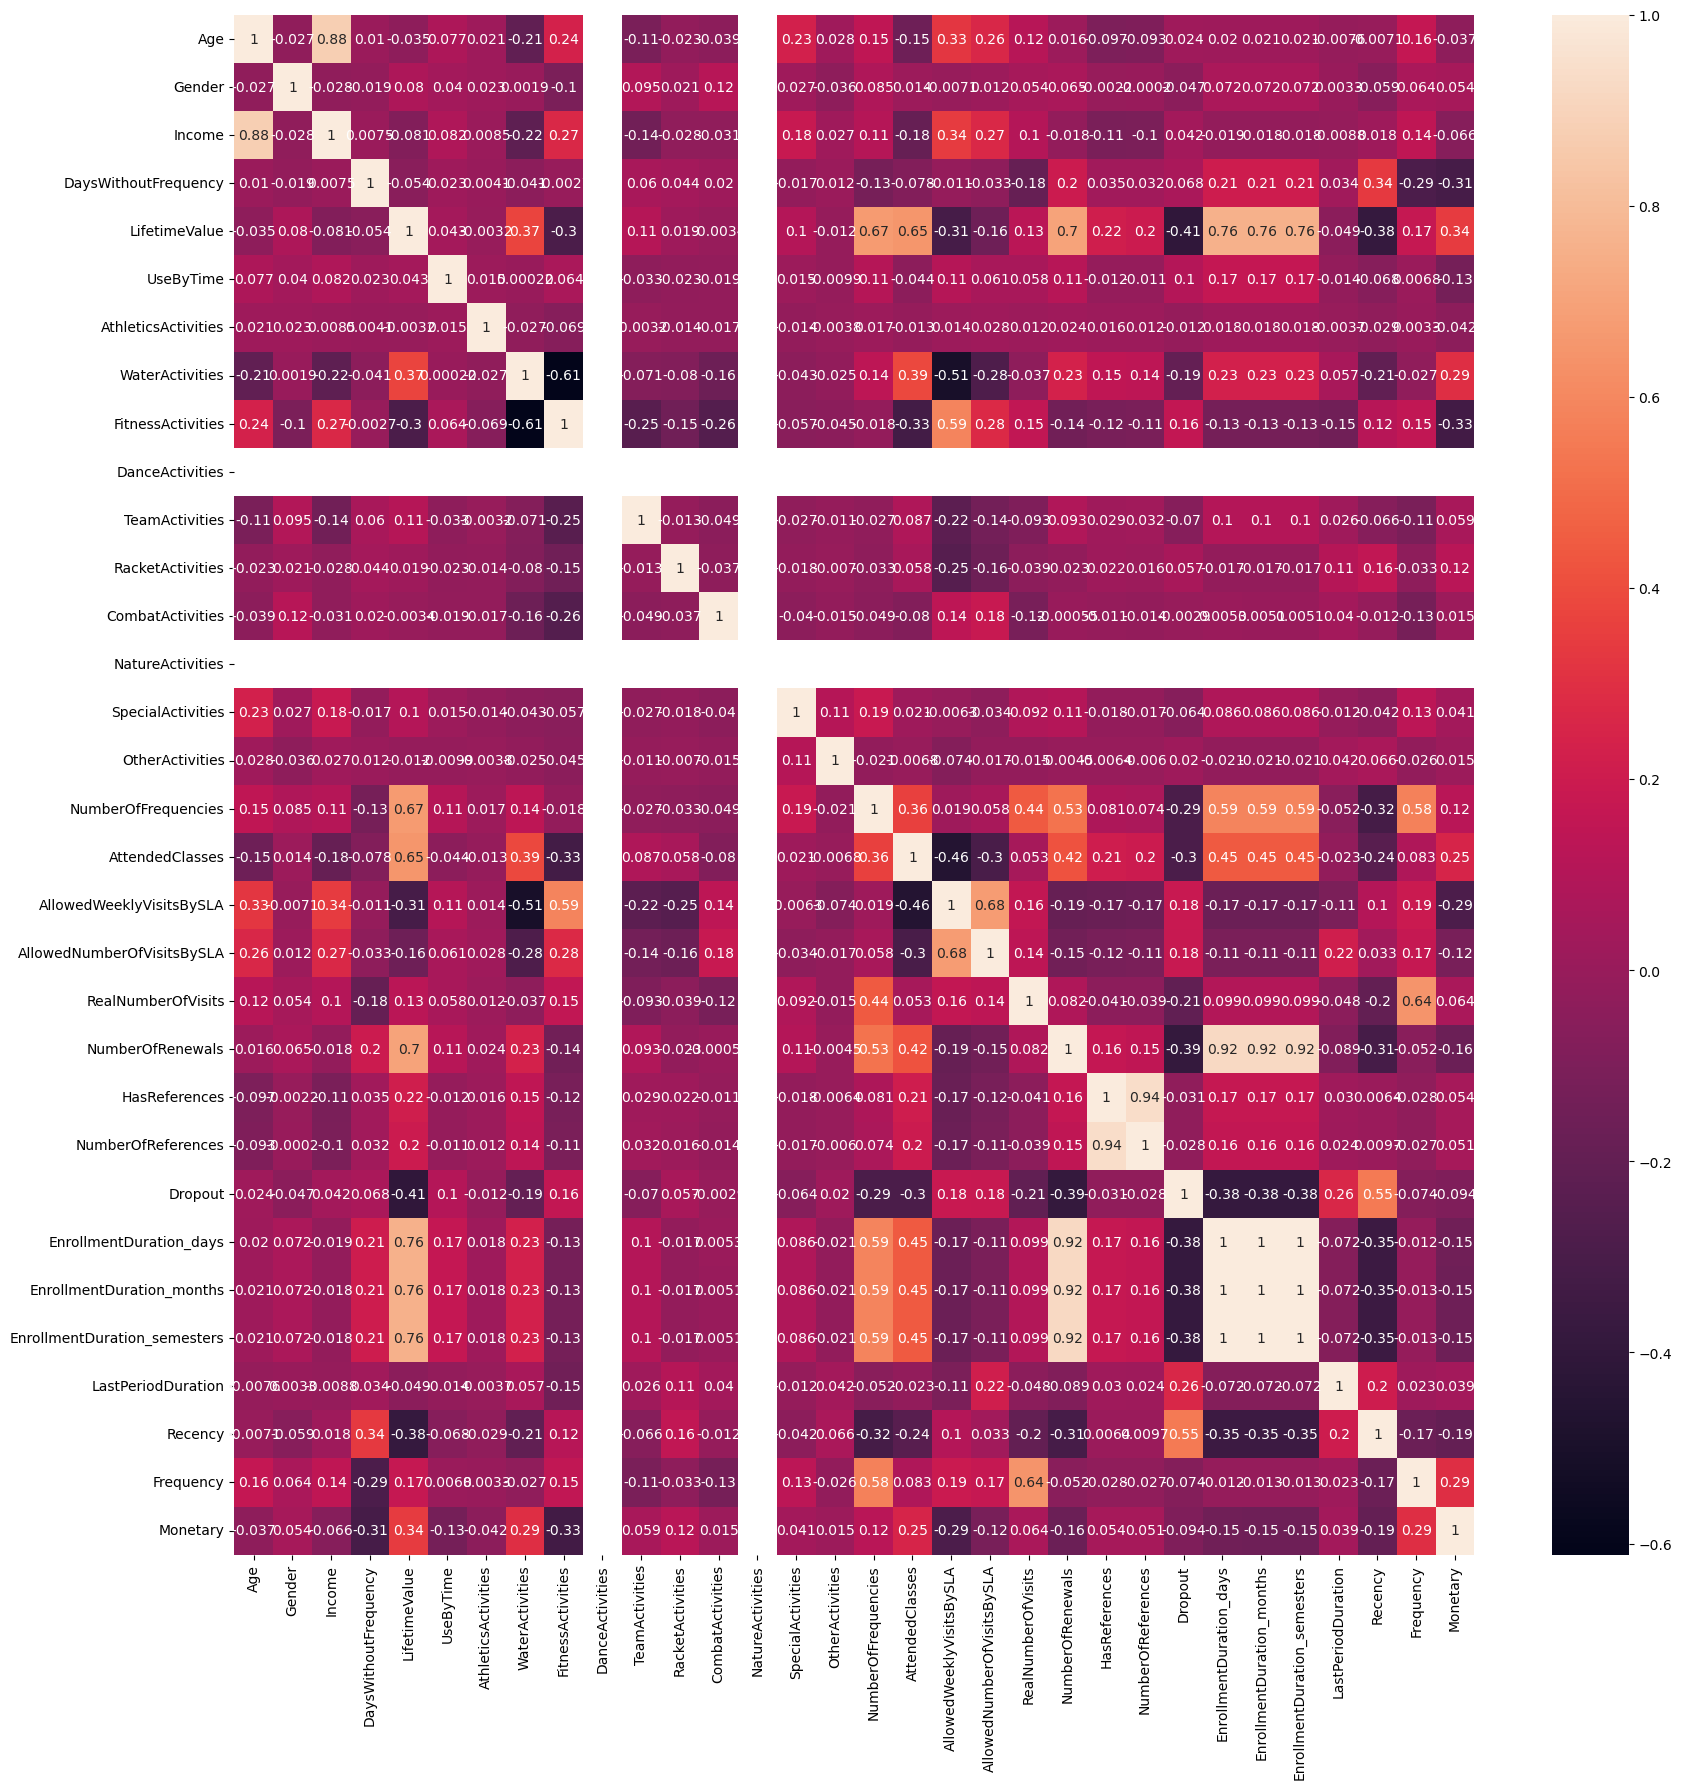

In [37]:
#plot heat map to see correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, )
plt.show()

In [38]:
#see the features that have above .95 correlation
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.95)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var




[('EnrollmentDuration_days', 'EnrollmentDuration_months'),
 ('EnrollmentDuration_days', 'EnrollmentDuration_semesters'),
 ('EnrollmentDuration_months', 'EnrollmentDuration_semesters')]

In [39]:
#Drop the features that have above .95 correlation
df = df.drop(['EnrollmentDuration_months', 'EnrollmentDuration_days'], axis=1)

In [40]:
#seperate the numeric columns
numeric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences','LastPeriodDuration', 'Recency', 'EnrollmentDuration_semesters', 'Monetary', 'Frequency']
df_numeric = df[numeric_features]
df_numeric

Age       Income  DaysWithoutFrequency  LifetimeValue  \
ID                                                             
10001   29  2630.000000                    60         479.20   
10002   23  1980.000000                     7          37.60   
10003    9     0.000000                    22         155.40   
10004   35  4320.000000                   210         373.20   
10005   24  2220.000000                     3         140.00   
...    ...          ...                   ...            ...   
24937   14     0.000000                     2        1460.45   
24938   39  2176.851113                    38         343.85   
24939   20  1810.000000                     2          43.60   
24940   55  4800.000000                     3         788.60   
24941   32  3700.000000                    14         919.60   

       NumberOfFrequencies  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                                                                      
10001                 23.0                1                       2.0   
10002                  6.0                0                       7.0   
10003                 20.0                2                       2.0   
10004                 41.0                0                       7.0   
10005                 28.0                0                       7.0   
...                    ...              ...                       ...   
24937                112.0               96                       4.0   
24938                 57.0                0                       7.0   
24939                  6.0                0                       7.0   
24940                185.0              155                       3.0   
24941                169.0                1                       7.0   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10001                       17.42                   1                 2   
10002                       30.03                   6                 0   
10003                       17.72                   3                 0   
10004                       60.97                   0                 3   
10005                       59.01                  26                 0   
...                           ...                 ...               ...   
24937                       34.84                   8                 3   
24938                       60.97                   3                 0   
24939                       30.03                   8                 0   
24940                       15.87                   7                 2   
24941                       60.97                  13                 4   

       NumberOfReferences  LastPeriodDuration  Recency  \
ID                                                       
10001                   0                 364     1568   
10002                   0                 180      889   
10003                   0                 364      283   
10004                   0                 180      721   
10005                   0                 365     1190   
...                   ...                 ...      ...   
24937                   0                 183        2   
24938                   0                 181     1282   
24939                   0                 180      946   
24940                   0                 183        3   
24941                   0                 180      156   

       EnrollmentDuration_semesters    Monetary  Frequency  
ID                                                          
10001                          2.33  205.665236   9.871245  
10002                          0.17  221.176471  35.294118  
10003                          1.00  155.400000  20.000000  
10004                          4.33   86.189376   9.468822  
10005                          1.50   93.333333  18.666667  
...                             ...         ...        ...  
24937

In [41]:
df_non_numeric = df.drop(numeric_features, axis=1)
df_non_numeric

Gender  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                               
10001       0          0                  0.0              0.0   
10002       1          0                  0.0              0.0   
10003       1          0                  0.0              0.0   
10004       1          0                  0.0              0.0   
10005       0          0                  0.0              0.0   
...       ...        ...                  ...              ...   
24937       1          0                  0.0              1.0   
24938       1          0                  0.0              0.0   
24939       1          0                  0.0              0.0   
24940       1          0                  0.0              1.0   
24941       0          0                  0.0              0.0   

       FitnessActivities  DanceActivities  TeamActivities  RacketActivities  \
ID                                                                            
10001                0.0              0.0             0.0               0.0   
10002                1.0              0.0             0.0               0.0   
10003                0.0              0.0             1.0               0.0   
10004                1.0              0.0             0.0               0.0   
10005                1.0              0.0             0.0               0.0   
...                  ...              ...             ...               ...   
24937                0.0              0.0             0.0               0.0   
24938                0.0              0.0             0.0               0.0   
24939                1.0              0.0             0.0               0.0   
24940                0.0              0.0             0.0               0.0   
24941                1.0              0.0             0.0               0.0   

       CombatActivities  NatureActivities  SpecialActivities  OtherActivities  \
ID                                                                              
10001               0.0               0.0                1.0              0.0   
10002               0.0               0.0                0.0              0.0   
10003               0.0               0.0                0.0              0.0   
10004               0.0               0.0                0.0              0.0   
10005               0.0               0.0                0.0              0.0   
...                 ...               ...                ...              ...   
24937               0.0               0.0                0.0              0.0   
24938               1.0               0.0                0.0              0.0   
24939               0.0               0.0                0.0              0.0   
24940               0.0               0.0                0.0              0.0   
24941               0.0               0.0                0.0              0.0   

       HasReferences  Dropout  
ID                             
10001            0.0        1  
10002            0.0        1  
10003            0.0        1  
10004            0.0        1  
10005            0.0        1  
...              ...      ...  
24937            0.0        0  
24938            0.0        1  
24939            0.0        1  
24940            0.0        0  
24941            0.0        1  

[14378 rows x 14 columns]

<Figure size 1600x1000 with 0 Axes>

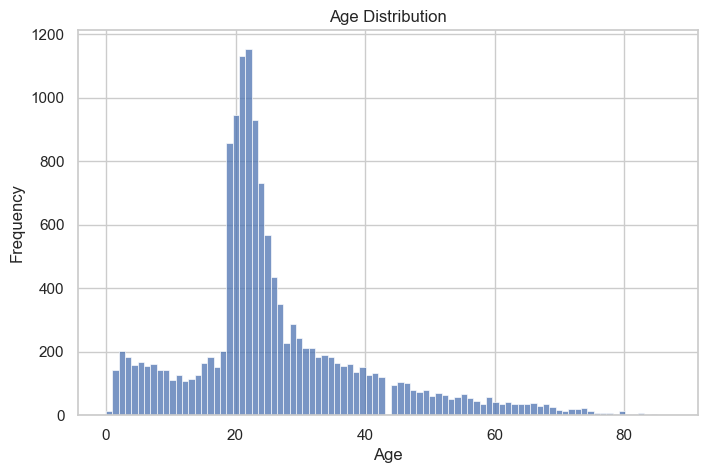

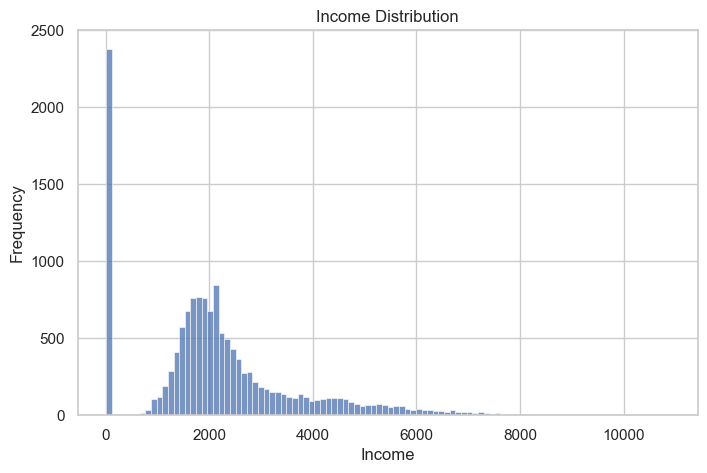

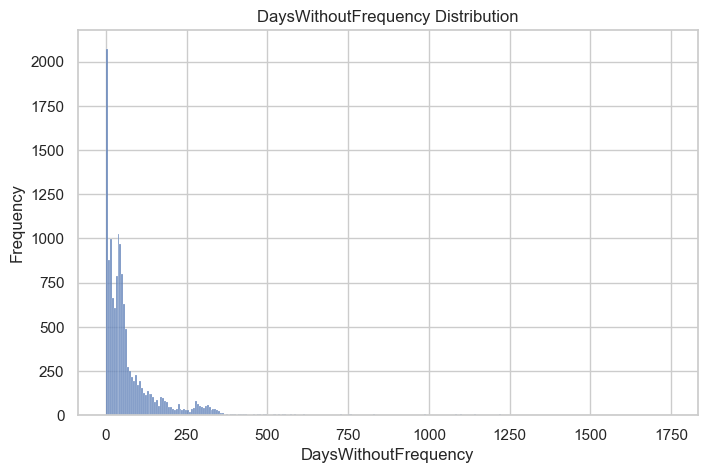

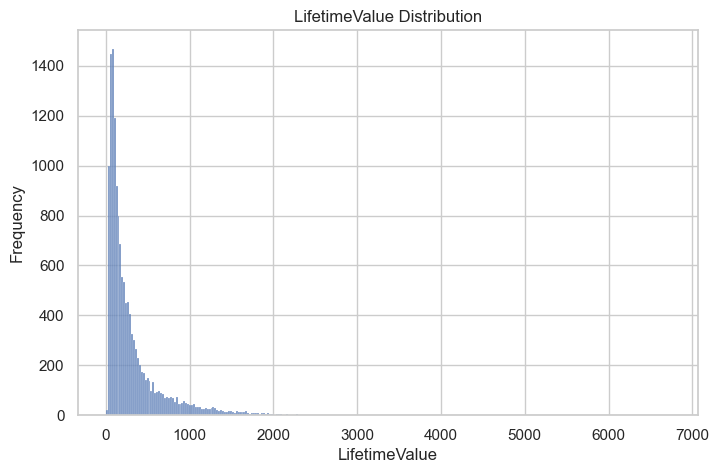

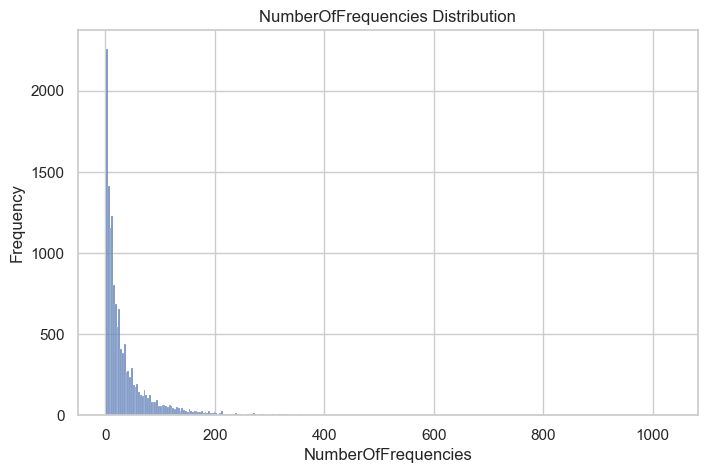

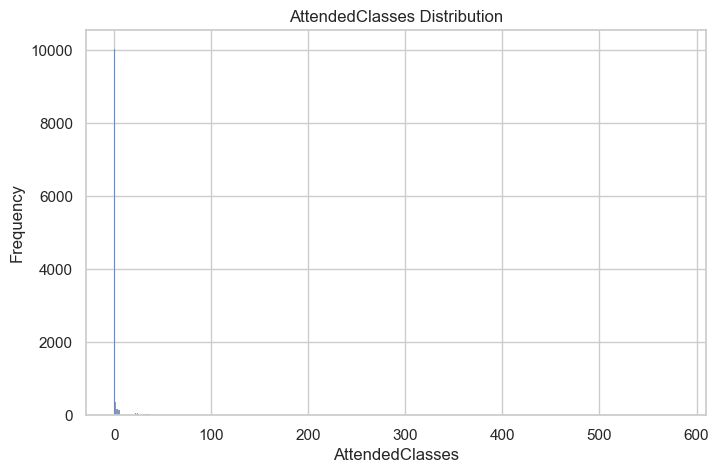

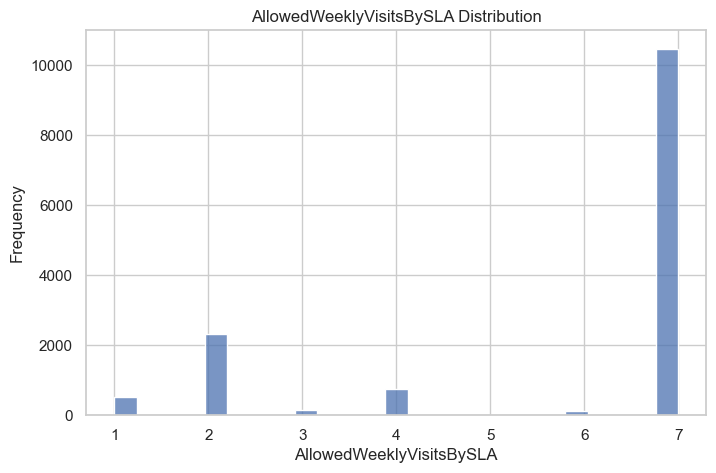

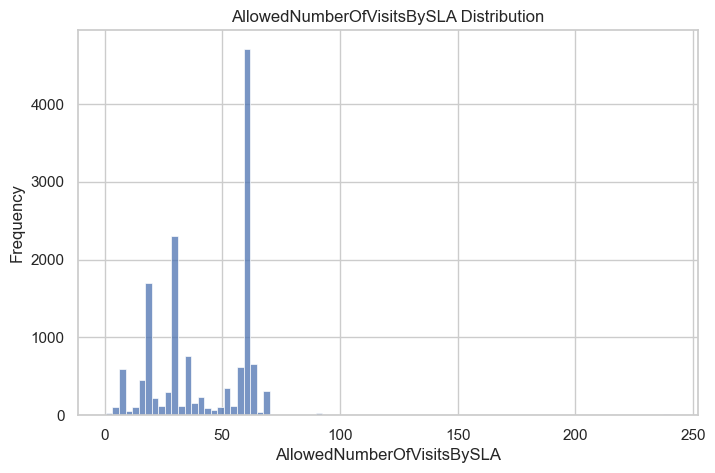

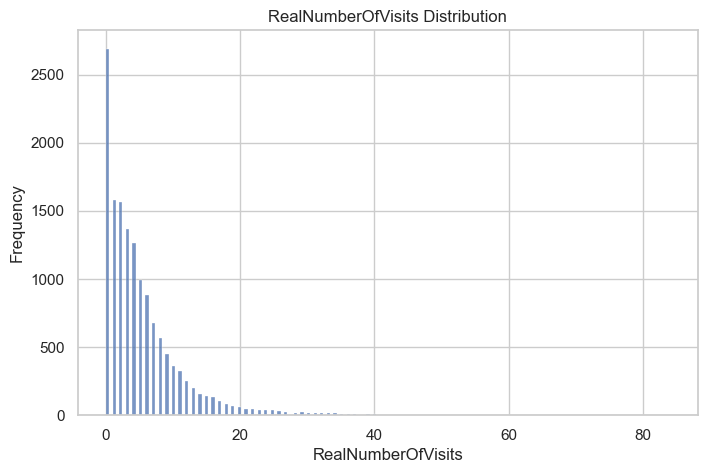

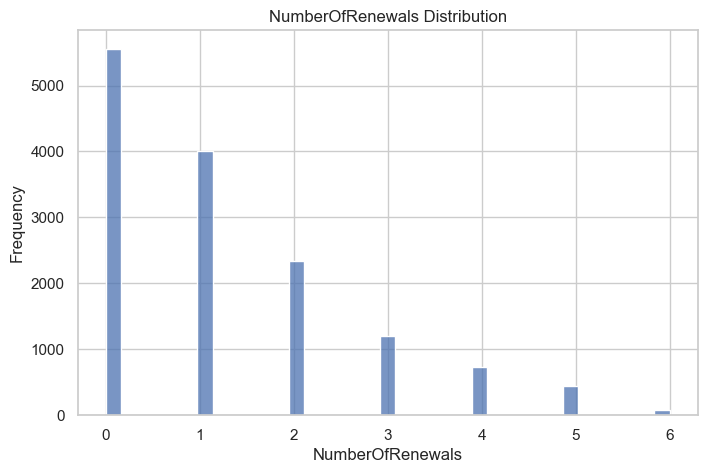

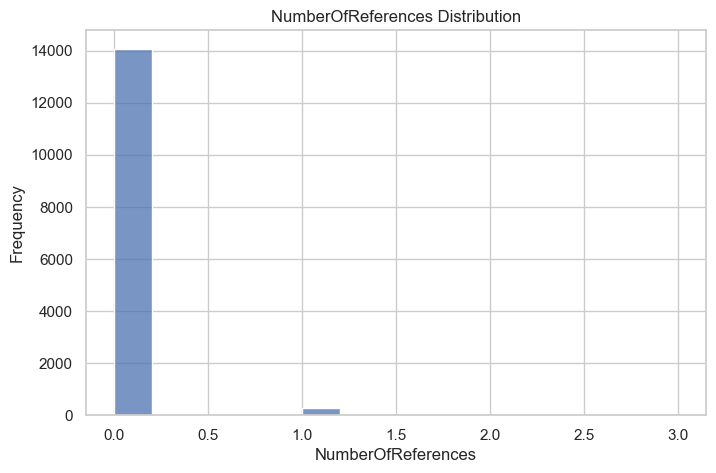

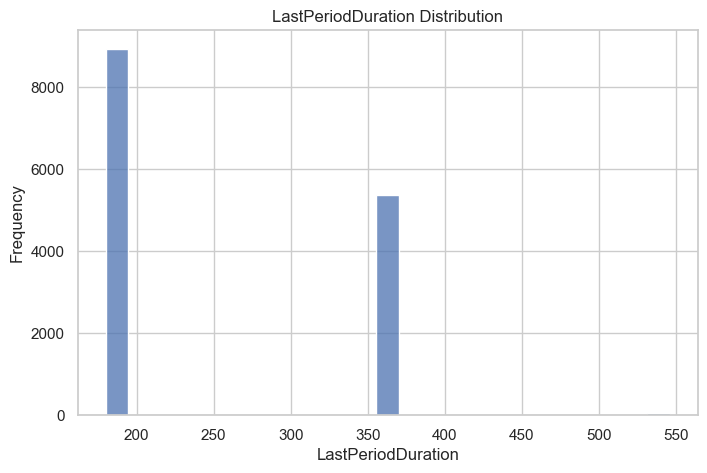

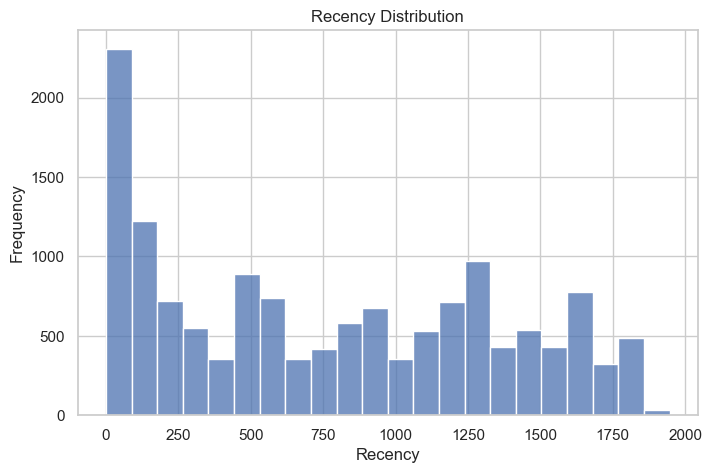

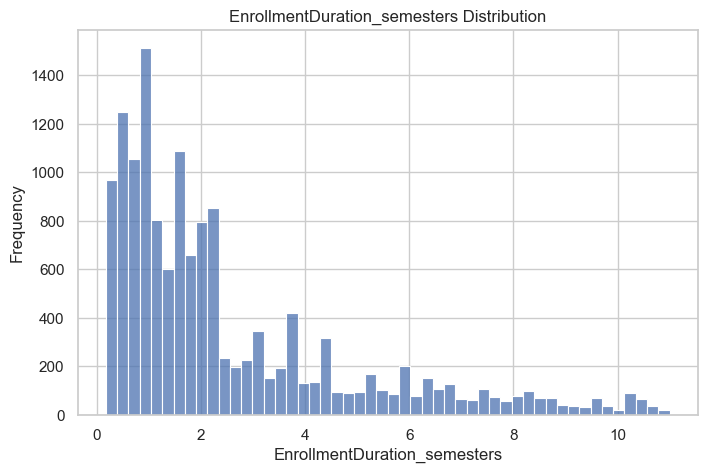

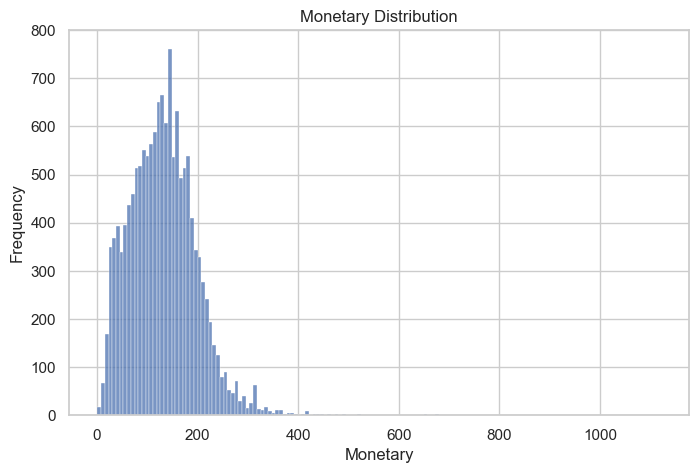

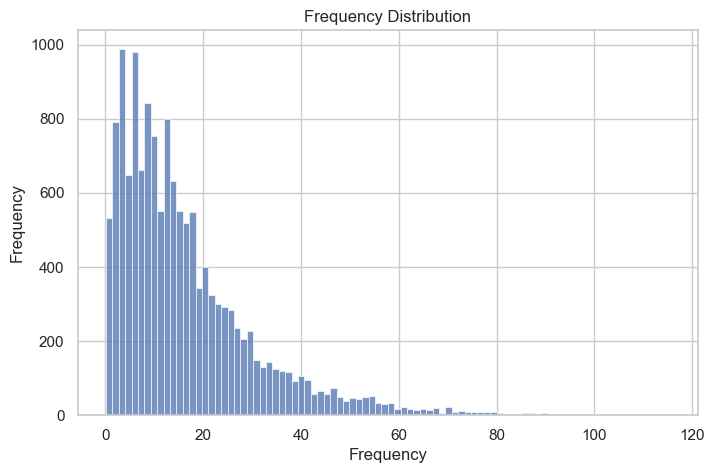

In [42]:
# Set up the figure size and style
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plot individual histograms for each numeric feature without the kernel density estimation line
for feat in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feat], kde=False)
    plt.title(feat + ' Distribution')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.show() 

<Figure size 1600x1000 with 0 Axes>

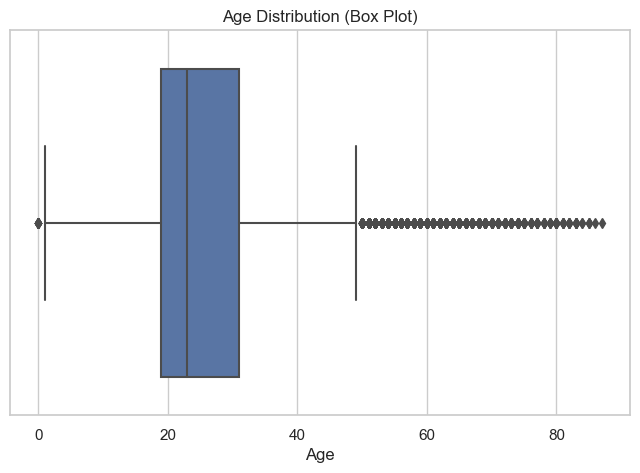

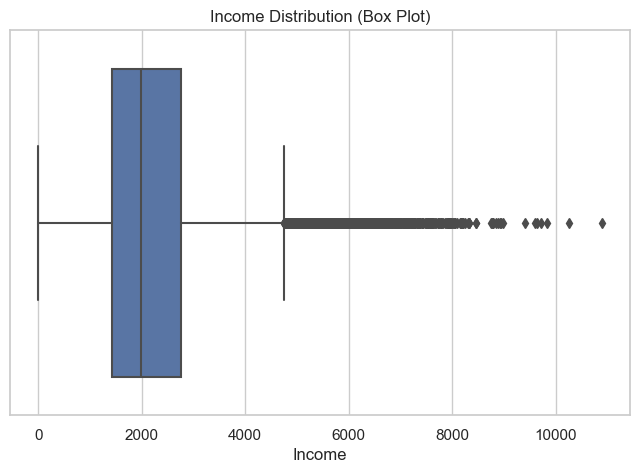

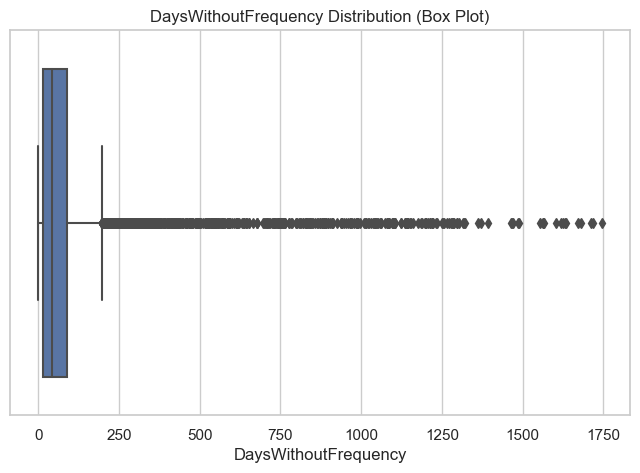

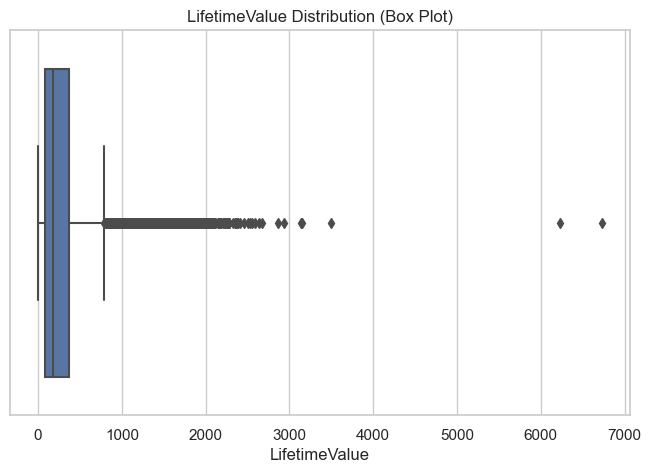

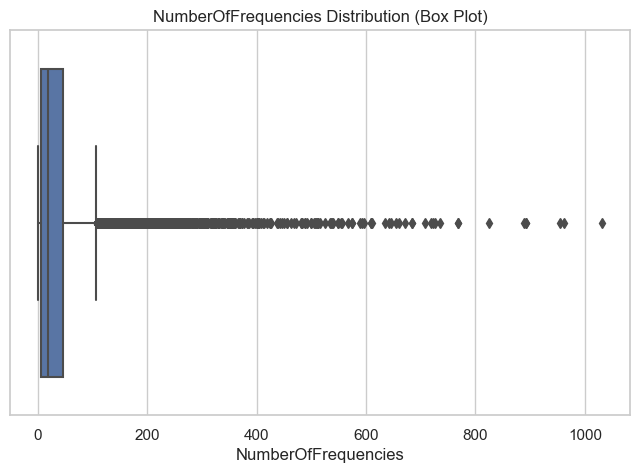

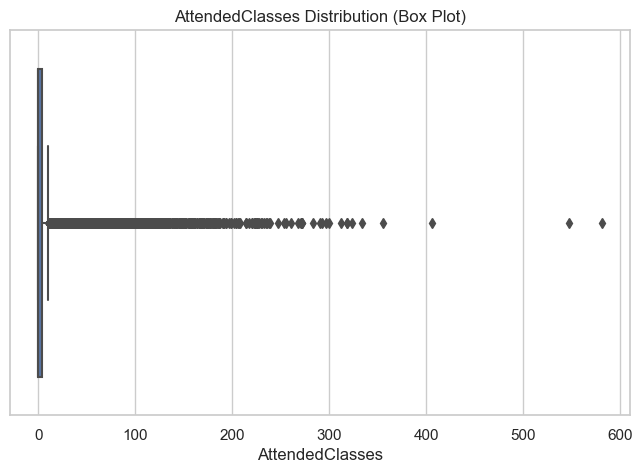

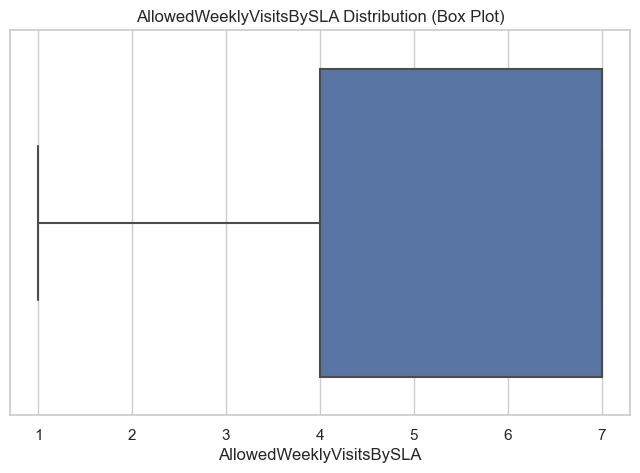

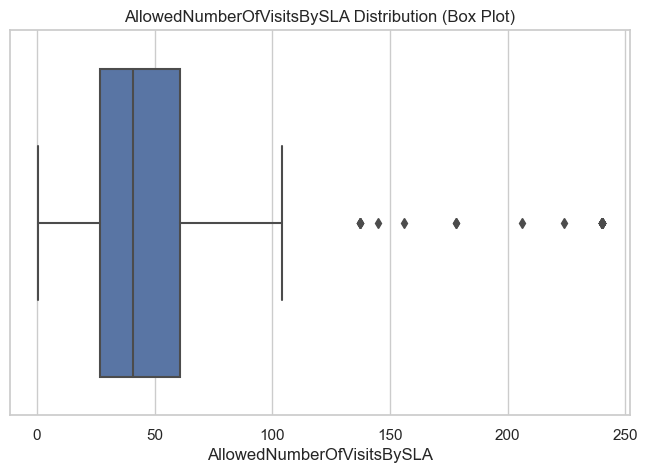

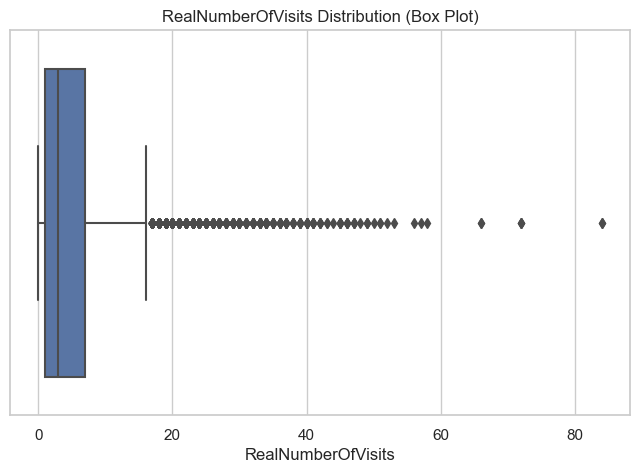

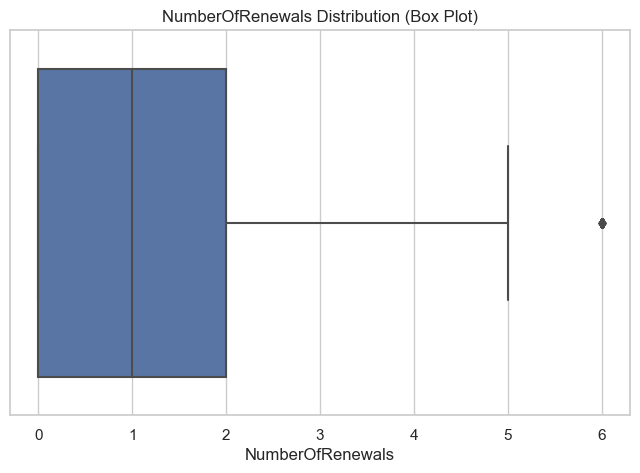

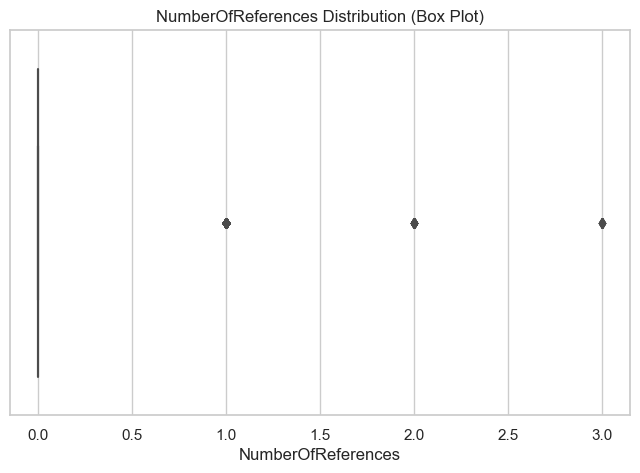

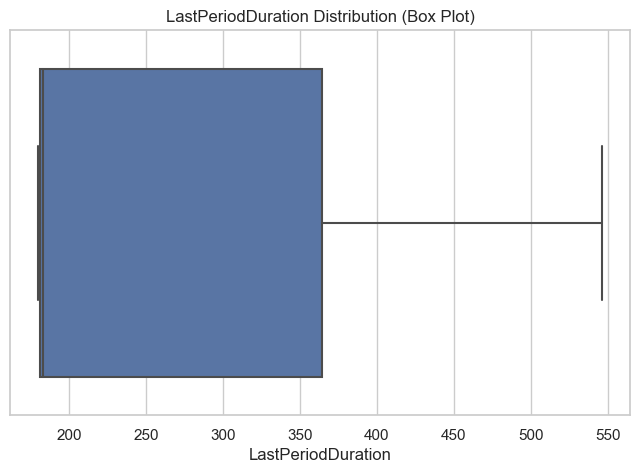

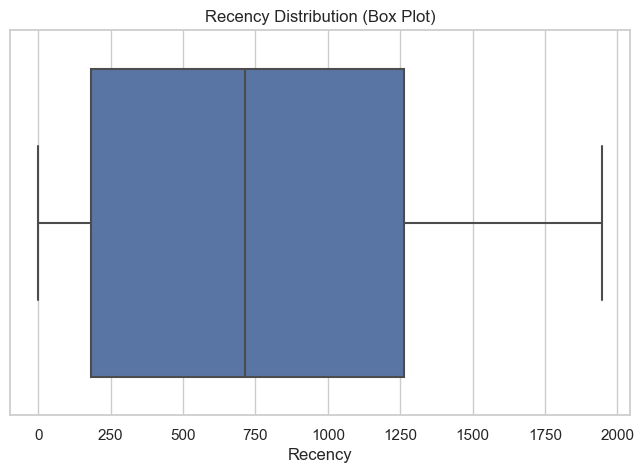

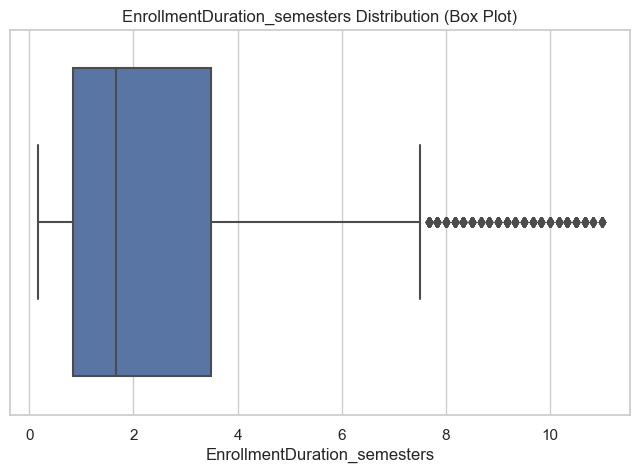

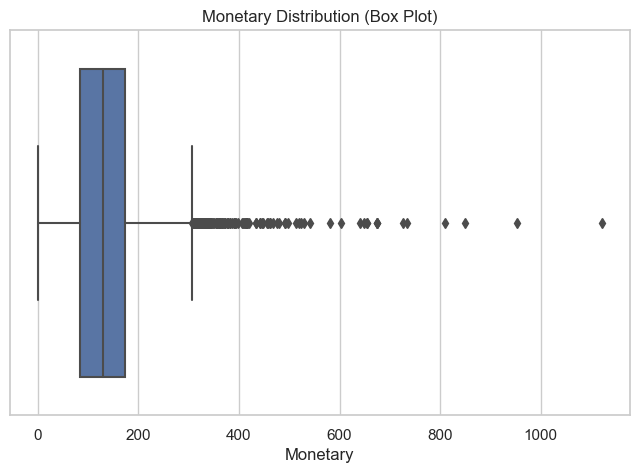

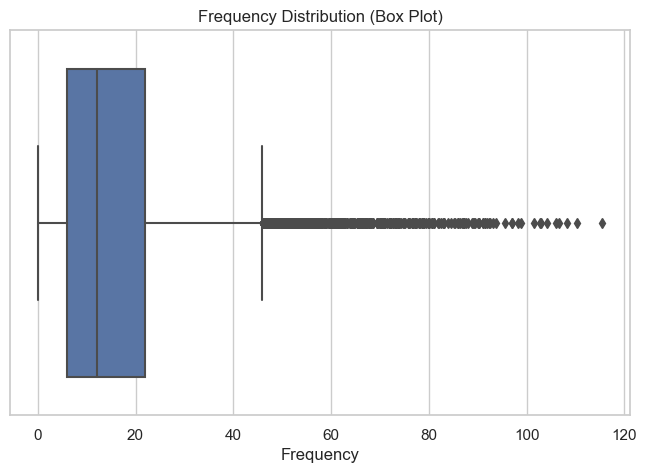

In [43]:
# Set up the figure size and style
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plot box plots for each numeric feature
for feat in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feat])
    plt.title(feat + ' Distribution (Box Plot)')
    plt.xlabel(feat)
    plt.show()

c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


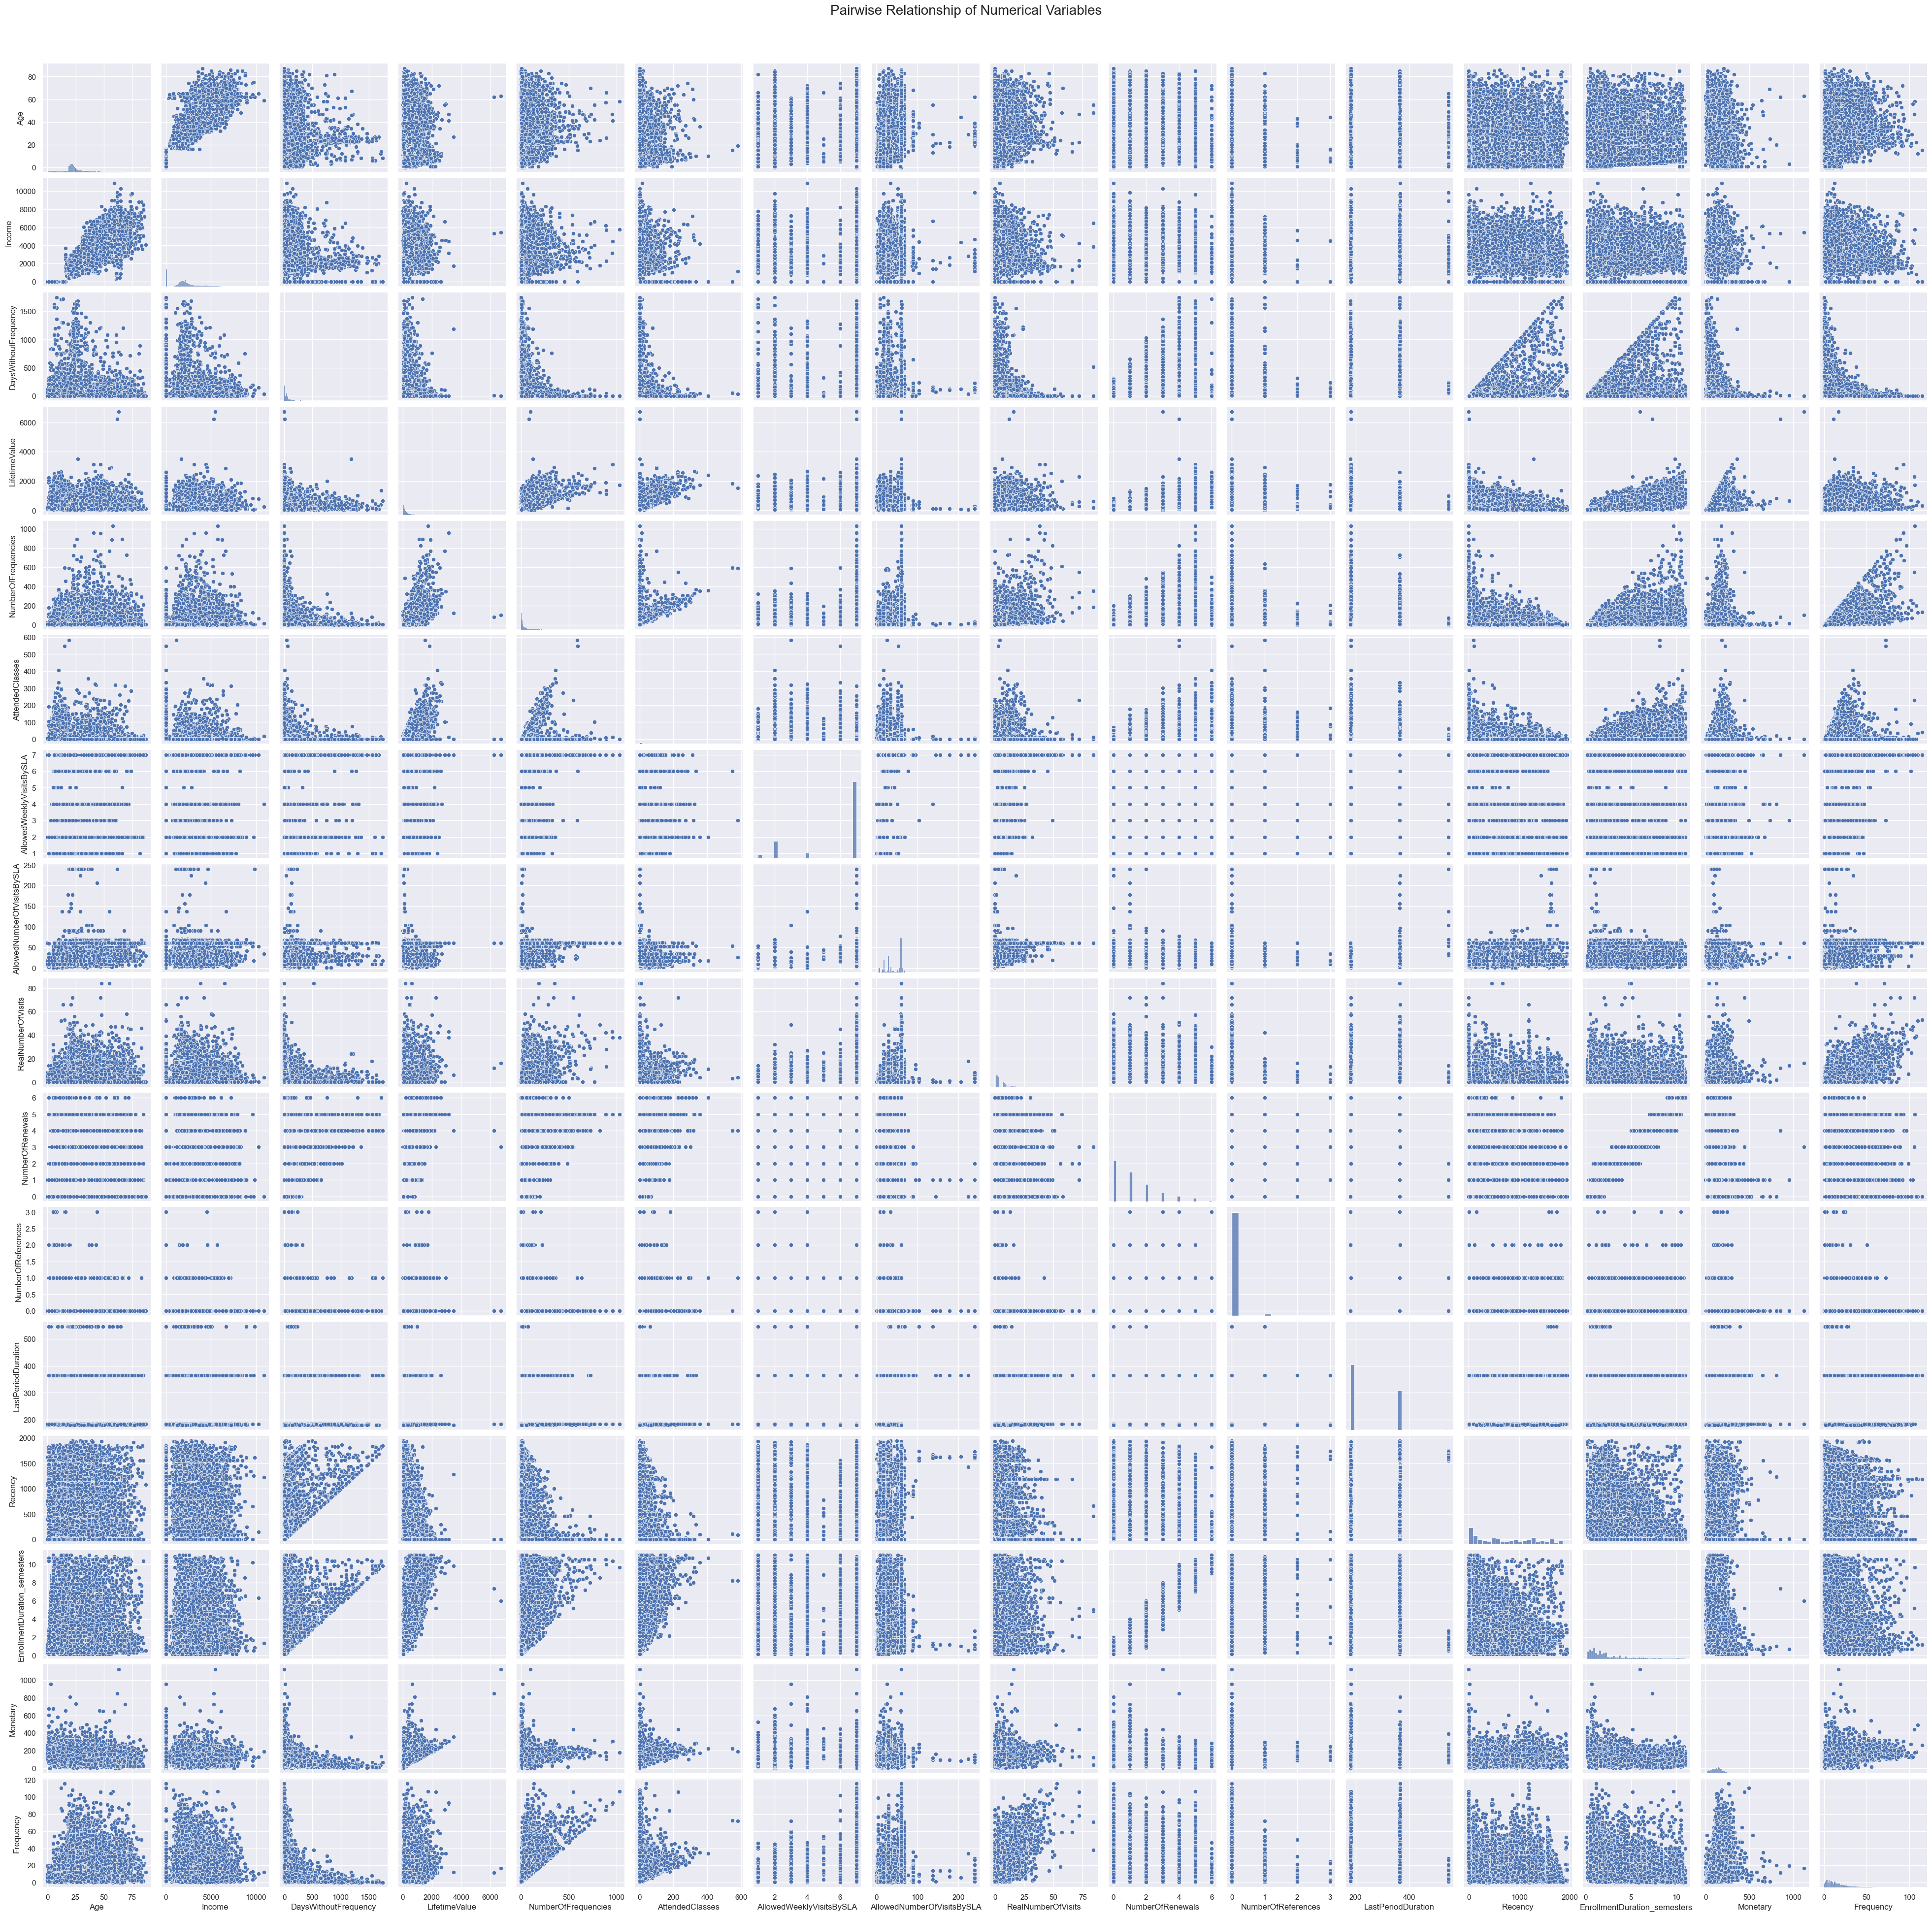

In [44]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[numeric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()


profile = ProfileReport(
    df, 
    title='Numeric Data Report',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)


_Outliers_

In [46]:
filters = (
    (df_numeric['Income'] <= 9000) &
    (df_numeric['DaysWithoutFrequency'] <= 1350) &
    (df_numeric['LifetimeValue'] <= 2800) &
    (df_numeric['NumberOfFrequencies'] <= 780) &
    (df_numeric['AttendedClasses'] <= 300) &
    (df_numeric['AllowedNumberOfVisitsBySLA'] <= 100) &
    (df_numeric['RealNumberOfVisits'] <= 50) &
    (df_numeric['Monetary'] <= 550) &
    (df_numeric['Frequency'] <= 100)
)

df_filtered = df_numeric[filters]

print('Percentage of data kept after removing outliers:', np.round(df_filtered.shape[0] / df_numeric.shape[0], 4))

Percentage of data kept after removing outliers: 0.9921


In [47]:
# Join the numeric and non-numeric dataframes after the cleaning
df = df_numeric.join(df_non_numeric)

## RFM Analysis

Recency – When was the last time the customer made a purchase? = "Recency"
* Assign a score of 5 to the most recent customers and 1 to the least recent.

Frequency – How many times did the customer purchase? = "NumberOfFrequencies"
* Assign a score of 5 to the most frequent customers and 1 to the least frequent.

Monetary – How much money did the customer spend? = "LifetimeValue"
* Assign a score of 5 to the highest spenders and 1 to the lowest spenders.

In [48]:
rfm=['Recency', 'Frequency', 'Monetary']

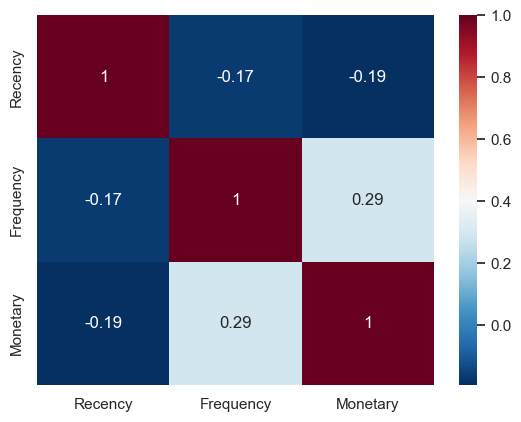

In [49]:
#plot the correlation matrix
corr = df[rfm].corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.show()

In [50]:
#Computing the RFM Scores (Individual and Combined)
df['R_Score'] = pd.qcut(df['Recency'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[5, 4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['Frequency'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5])
df['M_Score'] = pd.qcut(df['Monetary'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5])
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df["RFM_Score"]=df[['R_Score','F_Score','M_Score']].sum(axis=1)

In [51]:
df["RFM_Score"].describe()

count    14378.000000
mean         8.990263
std          2.998604
min          3.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         15.000000
Name: RFM_Score, dtype: float64

In [52]:
#Add labels according to RFM_Score
def label_scores(score):
    if score >= 12:
        return 'High Value'
    elif 8 <= score < 12:
        return 'Medium Value'
    else:
        return 'Low Value'

df['RFM_Score_Labels'] = df['RFM_Score'].apply(label_scores)

In [53]:
df["RFM_Score_Labels"].value_counts()

RFM_Score_Labels
Medium Value    6435
Low Value       4628
High Value      3315
Name: count, dtype: int64

In [54]:
df.head()

Age  Income  DaysWithoutFrequency  LifetimeValue  NumberOfFrequencies  \
ID                                                                             
10001   29  2630.0                    60          479.2                 23.0   
10002   23  1980.0                     7           37.6                  6.0   
10003    9     0.0                    22          155.4                 20.0   
10004   35  4320.0                   210          373.2                 41.0   
10005   24  2220.0                     3          140.0                 28.0   

       AttendedClasses  AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                                             
10001                1                       2.0                       17.42   
10002                0                       7.0                       30.03   
10003                2                       2.0                       17.72   
10004                0                       7.0                       60.97   
10005                0                       7.0                       59.01   

       RealNumberOfVisits  NumberOfRenewals  NumberOfReferences  \
ID                                                                
10001                   1                 2                   0   
10002                   6                 0                   0   
10003                   3                 0                   0   
10004                   0                 3                   0   
10005                  26                 0                   0   

       LastPeriodDuration  Recency  EnrollmentDuration_semesters    Monetary  \
ID                                                                             
10001                 364     1568                          2.33  205.665236   
10002                 180      889                          0.17  221.176471   
10003                 364      283                          1.00  155.400000   
10004                 180      721                          4.33   86.189376   
10005                 365     1190                          1.50   93.333333   

       Frequency  Gender  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                          
10001   9.871245       0          0                  0.0              0.0   
10002  35.294118       1          0                  0.0              0.0   
10003  20.000000       1          0                  0.0              0.0   
10004   9.468822       1          0                  0.0              0.0   
10005  18.666667       0          0                  0.0              0.0   

       FitnessActivities  DanceActivities  TeamActivities  RacketActivities  \
ID                                                                            
10001                0.0              0.0             0.0               0.0   
10002                1.0              0.0             0.0               0.0   
10003                0.0              0.0             1.0               0.0   
10004                1.0              0.0             0.0               0.0   
10005                1.0              0.0             0.0               0.0   

       CombatActivities  NatureActivities  SpecialActivities  OtherActivities  \
ID                                                                              
10001               0.0               0.0                1.0              0.0   
10002               0.0               0.0                0.0              0.0   
10003               0.0               0.0                0.0              0.0   
10004               0.0               0.0                0.0              0.0   
10005               0.0               0.0                0.0              0.0   

       HasReferences  Dropout R_Score F_Score M_Score RFM_Segment  RFM_Score  \
ID                                                                             
10001            0.0        1   

In [55]:
#show the mean of each variable by RFM score
df.groupby('RFM_Score_Labels').agg({'Recency': 'mean',
                                    'Frequency': 'mean',
                                    'Monetary': ['mean', 'count']}).round(1)


Recency Frequency Monetary      
                    mean      mean     mean count
RFM_Score_Labels                                 
High Value         259.9      29.6    188.5  3315
Low Value         1176.7       6.4     76.6  4628
Medium Value       727.6      16.8    142.8  6435

- High Value Customers

In [56]:
#desribe features of High Value customers
features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',"Recency", "Frequency", "Monetary"]
df[features][df['RFM_Score_Labels'] == 'High Value'].describe().transpose()


count         mean          std        min         25%  \
Age                   3315.0    26.961991    17.945832   0.000000   13.000000   
Income                3315.0  2201.019043  1936.434040   0.000000    0.000000   
DaysWithoutFrequency  3315.0    22.388235    32.287368   0.000000    3.000000   
LifetimeValue         3315.0   584.398899   553.406926  30.000000  157.300000   
Recency               3315.0   259.864555   342.652565   0.000000    5.000000   
Frequency             3315.0    29.620766    16.641391   5.311778   17.030540   
Monetary              3315.0   188.481269    59.513557  73.423423  153.215929   

                              50%          75%          max  
Age                     24.000000    38.000000    86.000000  
Income                1980.000000  3350.000000  8950.000000  
DaysWithoutFrequency    12.000000    32.000000   365.000000  
LifetimeValue          382.400000   879.050000  6727.800000  
Recency                108.000000   457.000000  1344.000000  
Frequency               26.000000    37.596992   115.384615  
Monetary               183.030303   212.709820  1121.300000

In [57]:
df["Gender"][df["RFM_Score_Labels"]=="High Value"].value_counts(normalize=True)

Gender
0    0.555354
1    0.444646
Name: proportion, dtype: float64

In [58]:
df["Dropout"][df["RFM_Score_Labels"]=="High Value"].value_counts(normalize=True)


Dropout
1    0.576471
0    0.423529
Name: proportion, dtype: float64

- Medium Value Customers

In [59]:
features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',"Recency", "Frequency", "Monetary"]
df[features][df['RFM_Score_Labels'] == 'Medium Value'].describe().transpose()


count         mean          std  min          25%  \
Age                   6435.0    26.033411    13.829628  0.0    19.000000   
Income                6435.0  2169.282217  1566.415695  0.0  1420.000000   
DaysWithoutFrequency  6435.0    55.348718    69.840884  0.0    18.000000   
LifetimeValue         6435.0   279.878118   273.335018  1.3    94.000000   
Recency               6435.0   727.553691   494.423830  0.0   251.000000   
Frequency             6435.0    16.801059    11.986852  0.2     8.811765   
Monetary              6435.0   142.764615    57.900410  0.8   106.177778   

                              50%          75%           max  
Age                     23.000000    31.000000     87.000000  
Income                1970.000000  2740.000000  10890.000000  
DaysWithoutFrequency    40.000000    62.000000   1185.000000  
LifetimeValue          185.500000   355.425000   3498.400000  
Recency                712.000000  1195.000000   1945.000000  
Frequency               14.000000    21.527385    102.985075  
Monetary               136.746988   170.421429    808.600000

In [60]:
df["Gender"][df["RFM_Score_Labels"]=="Medium Value"].value_counts(normalize=True)

Gender
0    0.587568
1    0.412432
Name: proportion, dtype: float64

In [61]:
df["Dropout"][df["RFM_Score_Labels"]=="Medium Value"].value_counts(normalize=True)

Dropout
1    0.877855
0    0.122145
Name: proportion, dtype: float64

- Low Value Customers

In [62]:
features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',"Recency", "Frequency", "Monetary"]
df[features][df['RFM_Score_Labels'] == 'Low Value'].describe().transpose()

count         mean          std       min         25%  \
Age                   4628.0    25.391962    10.878556  0.000000    20.00000   
Income                4628.0  2172.697503  1266.208175  0.000000  1570.00000   
DaysWithoutFrequency  4628.0   167.775497   219.105037  0.000000    47.00000   
LifetimeValue         4628.0   158.435743   142.430657  5.400000    66.57500   
Recency               4628.0  1176.727960   532.852014  0.000000   742.00000   
Frequency             4628.0     6.434842     5.037308  0.092336     2.73224   
Monetary              4628.0    76.582847    42.549355  3.664122    43.12911   

                              50%          75%          max  
Age                     23.000000    27.000000    84.000000  
Income                1990.000000  2520.000000  9840.000000  
DaysWithoutFrequency    96.500000   205.000000  1745.000000  
LifetimeValue          112.525000   201.200000  1373.950000  
Recency               1304.000000  1633.000000  1946.000000  
Frequency                5.128205     8.955224    35.042735  
Monetary                69.569489   103.030303   371.515152

In [63]:
df["Gender"][df["RFM_Score_Labels"]=="Low Value"].value_counts(normalize=True)

Gender
0    0.632022
1    0.367978
Name: proportion, dtype: float64

In [64]:
df["Dropout"][df["RFM_Score_Labels"]=="Low Value"].value_counts(normalize=True)

Dropout
1    0.939283
0    0.060717
Name: proportion, dtype: float64

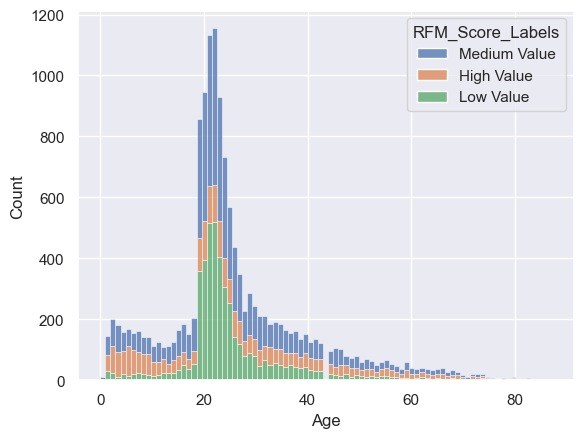

In [65]:
#plot the age distribution of the customers with hue being the RFM score
sns.histplot(data=df, x="Age", hue="RFM_Score_Labels", multiple="stack")
plt.show()


<Axes: xlabel='Income', ylabel='Count'>

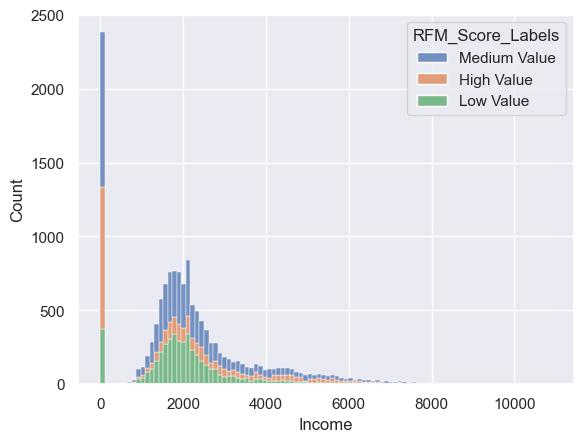

In [66]:
sns.histplot(data=df, x="Income", hue="RFM_Score_Labels", multiple="stack")

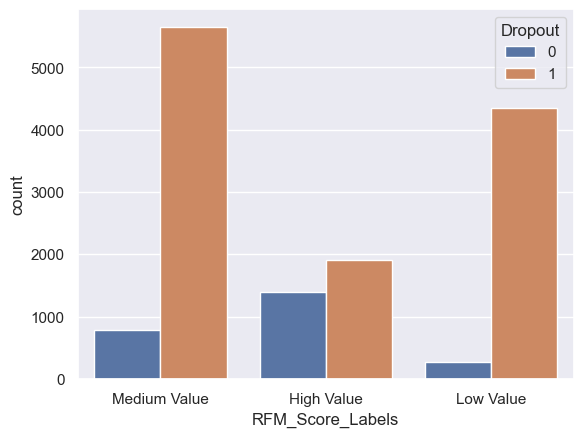

In [67]:
#plot the constitution of dropouts by RFM score
sns.countplot(data=df, x="RFM_Score_Labels", hue="Dropout")
plt.show()

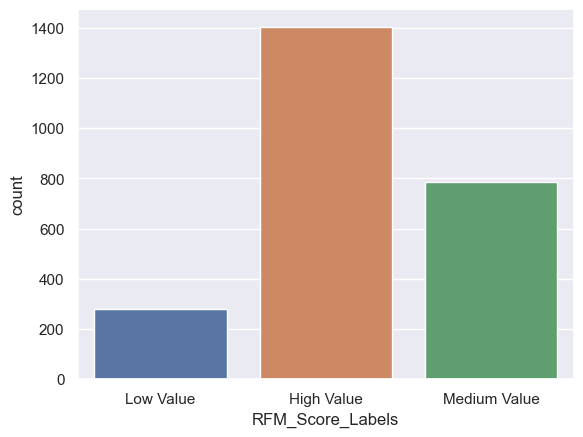

In [68]:
#plot the distribution of dropout=0 by RFM score
sns.countplot(data=df[df["Dropout"]==0], x="RFM_Score_Labels")
plt.show()

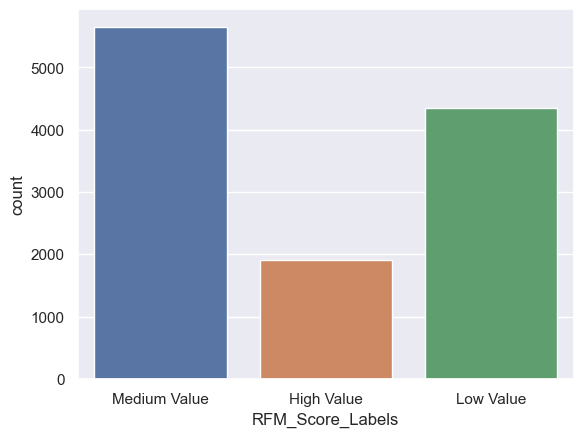

In [69]:
#plot the distribution of dropout=1 by RFM score
sns.countplot(data=df[df["Dropout"]==1], x="RFM_Score_Labels")
plt.show()

- Analysis of our current customers

In [70]:
current= df[df["Dropout"]==0]

In [71]:
activities = ['AthleticsActivities' ,'WaterActivities','DanceActivities','FitnessActivities','NatureActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']



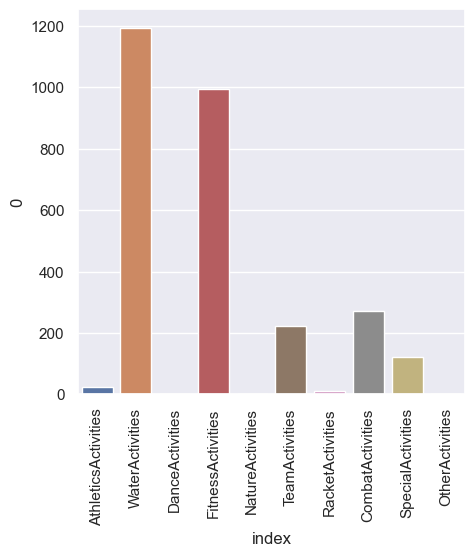

In [72]:
#plot the distribution of activities 
plt.figure(figsize=(5,5))
sns.barplot(data=current[activities].sum().reset_index(), x="index", y=0)
plt.xticks(rotation=90)
plt.show()


In [73]:
#df.to_csv('XYZ_sports_dataset_preprocessed_&_RFM.csv', sep=';', index=True)

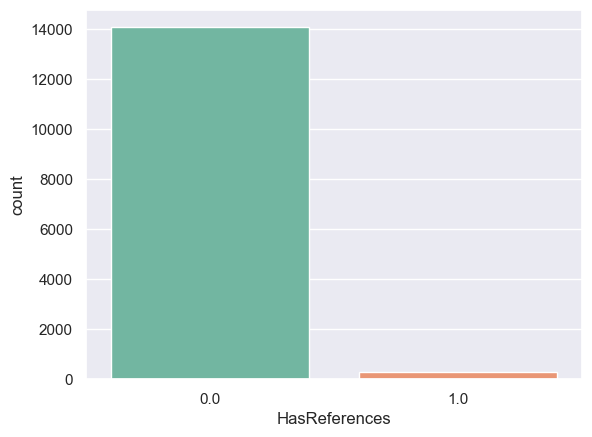

In [74]:
#plot the HasReferences distribution
sns.countplot(data=df, x="HasReferences", palette="Set2")
plt.show()



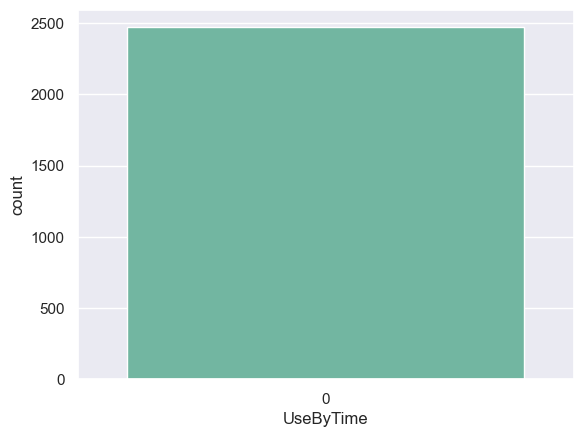

In [75]:
#plot the disttribution of HasReferences by RFM score
sns.countplot(data=current, x="UseByTime", palette="Set2")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

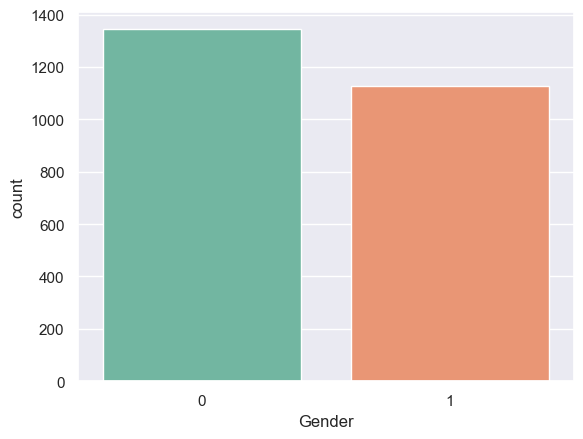

In [76]:
sns.countplot(data=current, x="Gender", palette="Set2")


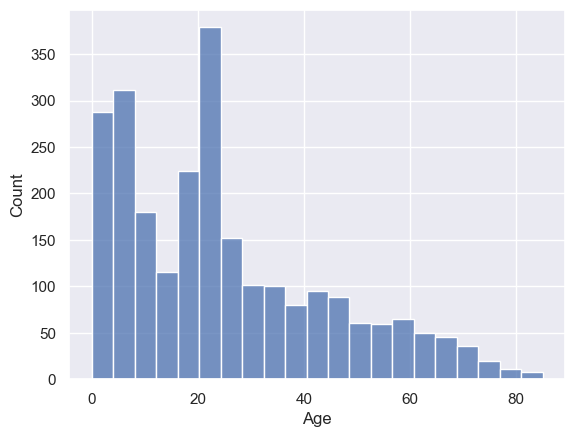

In [77]:
#plot the age distribution of the current customers
sns.histplot(data=current, x="Age")
plt.show()


In [78]:
#export to csv

df.to_csv('XYZ_sports_dataset_preprocessed.csv', sep=';', index=True)